In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

### Low Duration Outage

In [237]:
month = [12*i+8 for i in range(168)]
com = 1
com_folder = {1: 'HarrisCounty-SS',
              2: 'TravisCounty-DS',
              3: 'TravisCounty-RW'}
com_name = {1: 'Sunnyside Community',
              2: 'Dove Springs Community',
              3: 'Rogers Washington Community'}
Out = 'High'
OutDur = {'Low': 110, 'Med': 42, 'High': 106}
hours = np.array([0])
for _ in range(7):
        hours = np.concatenate((hours, np.array([6, 12, 18, 24])))
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
c = pd.read_csv('color.csv')['color']
x_color_l = ['black' for _ in range(16)] + ['red' for _ in range(10)] + ['black' for _ in range(168-26)]

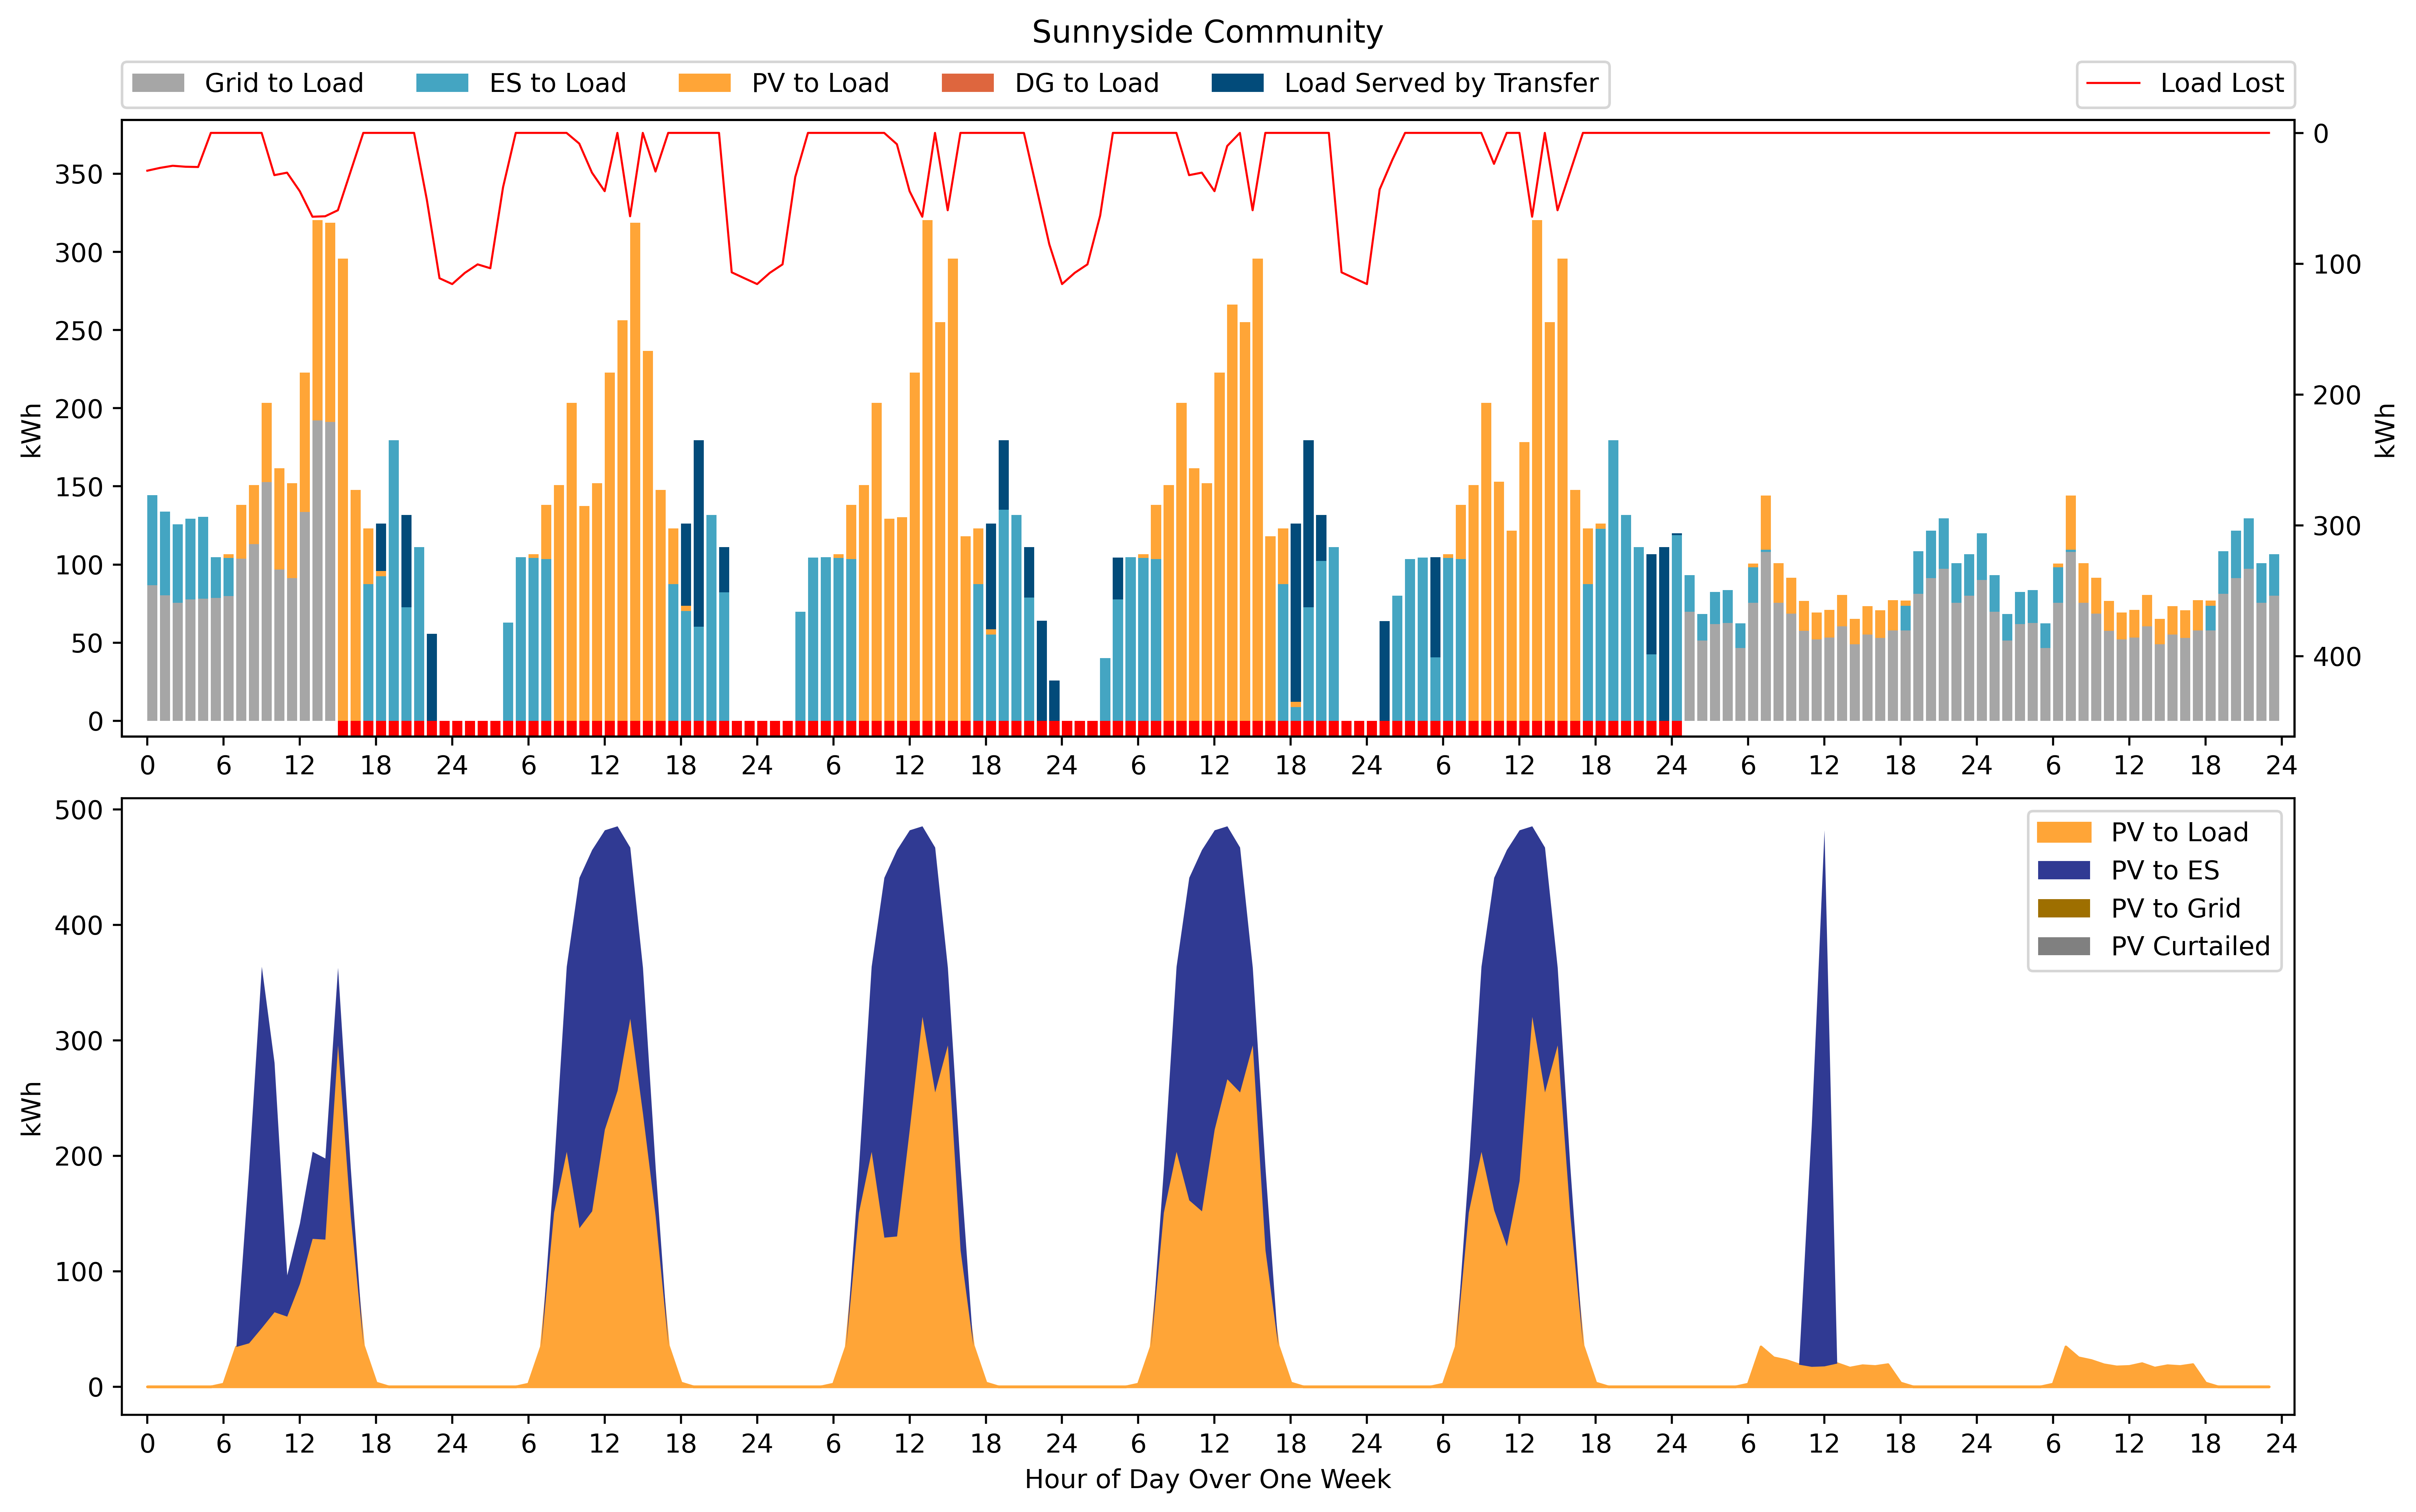

In [238]:
with open(f'{com_folder[com]} {Out}_Outage.pkl', 'rb') as handle:
    ESL, PVL, PVES, DGES, DGL, LT, LL, E, GL, GES, PVCur, PVGrid= pickle.load(handle)
handle.close()
itg = [(1, t, 1) for t in range(1, 169)]
rng = range(1, 169)

LTT = {(1, t, 1): sum([LT[(1, to, t, 1)] for to in range(1, t+1)]) for t in range(1, 169)}
LTT = np.array([LTT[i] for i in itg])
LTF = {(1, t, 1): sum([LT[(1, t, to, 1)] for to in range(t, 169)]) for t in range(1, 169)}
LTF = np.array([LTF[i] for i in itg])
ESL = np.array([ESL[i] for i in itg])
PVL = np.array([PVL[i] for i in itg])
PVES = np.array([PVES[i]  for i in itg])
DGES = np.array([DGES[i] for i in itg])
DGL = np.array([DGL[i] for i in itg])
LL = np.array([LL[i] for i in itg])
GL = np.array([GL[i] for i in itg])
PVCur = np.array([PVCur[i] for i in itg])
PVGrid = np.array([PVGrid[i] for i in itg])

'''Load Serving'''
fig, ax = plt.subplots(2, 1, figsize=(15, 9), dpi=500)
ax[0].bar(rng, GL, color='gray', align='edge', label='Grid to Load', alpha=0.7)

ax[0].bar(rng, ESL,
        bottom=GL, color='#44A5C2', align='edge', label='ES to Load')

ax[0].bar(rng, PVL,
        bottom=ESL+GL,
        color='#FFA537', align='edge', label='PV to Load')

ax[0].bar(rng, DGL,
        bottom=ESL+PVL+GL,
        color='#DE663E', align='edge', label='DG to Load')

ax[0].bar(rng, LTT,
        bottom=ESL+PVL+GL+DGL,
        color='#024B7A', align='edge', label='Load Served by Transfer')

ax[0].bar([16+i for i in range(OutDur[Out])], [-10 for _ in range(OutDur[Out])], color='red', align='edge')
LoadLost = LL + LTF
ax[0].set_ylim((-10, 1.2*ax[0].get_ylim()[1]))
ax[0].set_xticks([6*i+1 for i in range(29)], hours)
ax[0].set_xlim((-1, 170))
ax[0].set_ylabel('kWh')
ylim1 = ax[0].get_ylim()[1]
ax[0].legend(loc=[0, 1.02], ncol = 5)
ax[0].set_title(com_name[com], y=1.1)
# Load Lost Twin Plot
ax01 = ax[0].twinx()
ax01.plot(rng, LoadLost, color='red', label='Load Lost', linewidth=0.8)
ylim2 = ax01.get_ylim()[1]
ax01.set_ylabel('kWh')
ax01.set_ylim((-10, 1.2*max(ylim1, ylim2))[::-1])
ax01.legend(loc=[0.9, 1.02], ncol=2)
#plt.savefig(f'../IMG/{com_folder[com]}-{Out}_Outage.jpg', bbox_inches='tight')

'''PV Distribution'''

# Plotting the stacked lines
ax[1].fill_between(rng, PVL, label='PV to Load', color='#FFA537')
ax[1].fill_between(rng, PVL, PVL+PVES, label='PV to ES', color='#303A93', linewidth=0)
ax[1].fill_between(rng, PVL+PVES, PVL+PVES+PVGrid, label='PV to Grid', color='#9E6F00', linewidth=0)
ax[1].fill_between(rng, PVL+PVES+PVGrid, PVL+PVES+PVGrid+PVCur, label='PV Curtailed', color='gray', linewidth=0)
ax[1].set_xticks([6*i+1 for i in range(29)], hours)
ax[1].set_xlim((-1, 170))
ax[1].set_ylabel('kWh')
ax[1].set_xlabel('Hour of Day Over One Week')
ax[1].legend()
plt.subplots_adjust(hspace=0.1)
plt.savefig(f'../IMG/{com_folder[com]}-{Out}_Outage.jpg', bbox_inches='tight')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])